# Reto: Store Sales - Time Series Forecasting

Kaggle Competition: https://www.kaggle.com/competitions/store-sales-time-series-forecasting

Análisis Inicial:

Miembros del equipo:
- Josemaría Robledo Lara
- Ricardo Andrés Cáceres Villibord
- Rodrigo Muñoz Guerrero





---



### Importar librerías necesarias y montar el drive

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/SeptimoSemestre/ModIA/Reto"


Mounted at /content/gdrive


### Cargar Datos

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_stores = pd.read_csv('stores.csv')
df_transactions = pd.read_csv('transactions.csv')
df_oil = pd.read_csv('oil.csv')
df_holidays = pd.read_csv('holidays_events.csv')

/content/gdrive/MyDrive/SeptimoSemestre/ModIA/Reto


### Ver tipos de datos

In [ ]:
print("DF_TRAIN: \n", df_train.info())
print("DF_TEST: \n", df_test.info())
print("DF_STORES: \n", df_stores.info())
print("DF_TRANSACTIONS: \n",df_transactions.info())
print("DF_OIL: \n",df_oil.info())
print("DF_HOLIDAYS: \n",df_holidays.info())

### Convertir datos de fecha a tipo `datetime` y verificar si hay valores NaN

In [ ]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

print("NaNs en TRAIN: ", df_train.isna().sum())
print("\n NaNs en TEST: ", df_test.isna().sum())
print("\n NaNs en STORES: ", df_stores.isna().sum())
print("\n NaNs en TRANSACTIONS: ",df_transactions.isna().sum())
print("\n NaNs en OIL: ",df_oil.isna().sum())
print("\n NaNs en HOLIDAYS: ",df_holidays.isna().sum())

NameError: ignored

### Graficar las ventas por día

In [ ]:
plt.plot(df_train['date'], df_train.sales)

### Promedio y Desviación Estándar

In [ ]:
print("PROMEDIO: ", df_train['sales'].mean())
print("DESVIACIÓN ESTÁNDAR: ", df_train['sales'].std())

357.77574911261894
1101.9977213379996


### No se que hizo Muñoz

In [ ]:
df_clean = df_train[df_train['sales'] < 60000].copy()
print("El mean de las sales de df_clean: ", df_clean['sales'].mean())

357.6293032174428

### Se elimina un outlier y se grafican las ventas ya sin el outlier

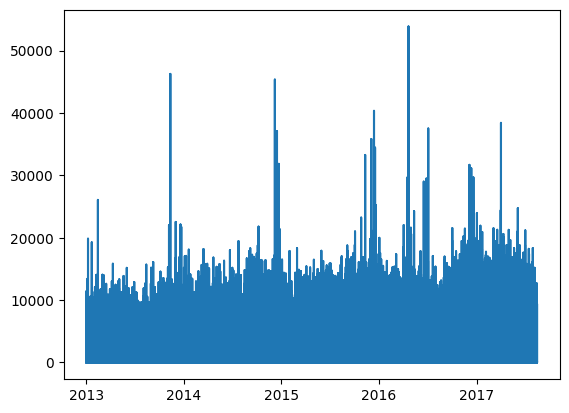

In [ ]:
# df_train = df_train[df_train['sales'] > 60000, ['sales']] = df_clean['sales'].mean()
df_train['sales'] = df_train['sales'].apply(lambda x : df_clean['sales'].mean() if x > 60000 else x)
plt.plot(df_train['date'], df_train.sales)

### Grafica las promociones contra las ventas CREO QUE ESTO NO AYUDA MUCHO

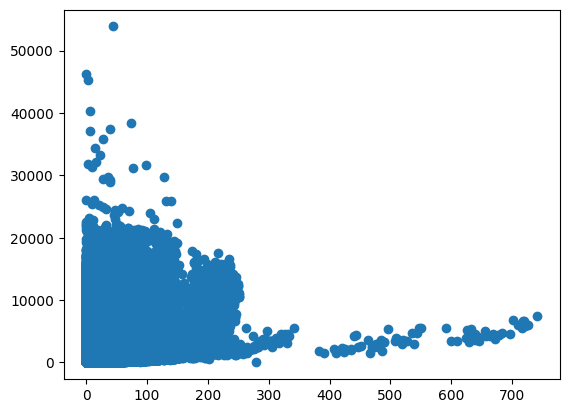

In [ ]:
plt.scatter(df_train['onpromotion'],df_train['sales'])

### Ventas por familia de productos

                        family         sales
12                   GROCERY I  3.431125e+08
3                    BEVERAGES  2.169545e+08
30                     PRODUCE  1.227047e+08
7                     CLEANING  9.752129e+07
8                        DAIRY  6.448771e+07
5                 BREAD/BAKERY  4.213395e+07
28                     POULTRY  3.187600e+07
24                       MEATS  3.099725e+07
25               PERSONAL CARE  2.459205e+07
9                         DELI  2.411032e+07
18                   HOME CARE  1.602274e+07
10                        EGGS  1.558830e+07
11                FROZEN FOODS  1.407389e+07
29              PREPARED FOODS  8.799895e+06
22            LIQUOR,WINE,BEER  7.746640e+06
32                     SEAFOOD  2.015432e+06
13                  GROCERY II  1.962767e+06
15          HOME AND KITCHEN I  1.861491e+06
16         HOME AND KITCHEN II  1.520670e+06
6                  CELEBRATION  7.611770e+05
21                    LINGERIE  6.531140e+05
19        

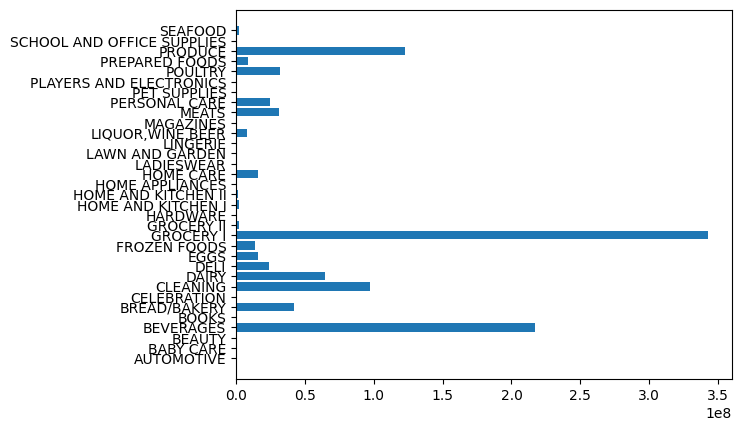

In [ ]:
# plt.scatter(df_train['family'],df_train['sales'])
group = df_train.groupby('family')['sales'].sum().reset_index()
plt.barh(group['family'],group['sales'])
plt.yticks(range(len(group)), group['family'])
print("VENTAS POR FAMILIA DE PRODUCTOS: \n", group.sort_values(by= 'sales', ascending = False))

In [ ]:
df_train[df_train['sales'] > 25000]

,id,date,store_nbr,family,sales,onpromotion
79674,79674,2013-02-14,44,GROCERY I,26067.000,0
562596,562596,2013-11-12,44,GROCERY I,46271.000,0
1257246,1257246,2014-12-08,35,GROCERY I,45361.000,3
1261635,1261635,2014-12-10,9,GROCERY I,31375.500,10
1269390,1269390,2014-12-15,26,GROCERY I,32209.000,17
1271832,1271832,2014-12-16,44,GROCERY I,37106.000,7
1275429,1275429,2014-12-18,45,GROCERY I,25991.000,13
1283844,1283844,2014-12-23,31,GROCERY I,31851.158,3
1857219,1857219,2015-11-11,2,GROCERY I,33274.000,23
1898370,1898370,2015-12-04,24,GROCERY I,35828.000,28


In [ ]:
print(df_train['sales'].mean())
print(df_train['sales'].std())

357.62930321744267
1095.8233887802473


### Calcula la matriz de correlación
Un valor de 1 indica una correlación positiva perfecta, lo que significa que cuando una variable aumenta, la otra también aumenta en proporción constante. Un valor de -1 indica una correlación negativa perfecta, lo que significa que cuando una variable aumenta, la otra disminuye en proporción constante. Un valor cercano a 0 indica una correlación débil o nula, lo que significa que las variables no están correlacionadas de manera significativa.

In [ ]:
df_train.corr()

<ipython-input-13-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,id,store_nbr,sales,onpromotion
id,1.000000,0.000301,0.086157,0.206260
store_nbr,0.000301,1.000000,0.041488,0.007286
sales,0.086157,0.041488,1.000000,0.429947
onpromotion,0.206260,0.007286,0.429947,1.000000


In [ ]:
# df_train_return = pd.DataFrame()
# df_train_return['sales'] = np.log(df_train['sales']).diff(1)
# df_train_return['date'] = df_train['date']
# df_train_return.dropna().reset_index()
# plt.hist(df_train_return['sales'],bins=12)

In [ ]:
# ESTO LO PUSE ARRIBA DONDE TAMBIEN SE HIZO PARA TRAIN

# df_test['date'] = pd.to_datetime(df_test['date'])
# print(df_test.info())
# print(df_test.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB
None
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


### Grafica promociones por fecha

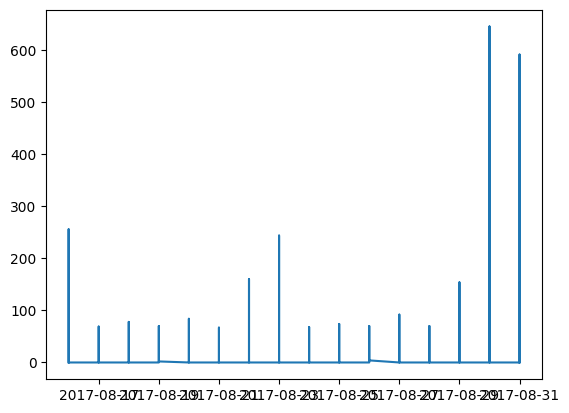

In [ ]:
plt.plot(df_test['date'], df_test['onpromotion'])

In [ ]:
# Esto lo puse arriba donde se hizo para las demas cosas

# print(df_stores.info())
# print(df_stores.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


### Número de tiendas por ciudad

<BarContainer object of 22 artists>

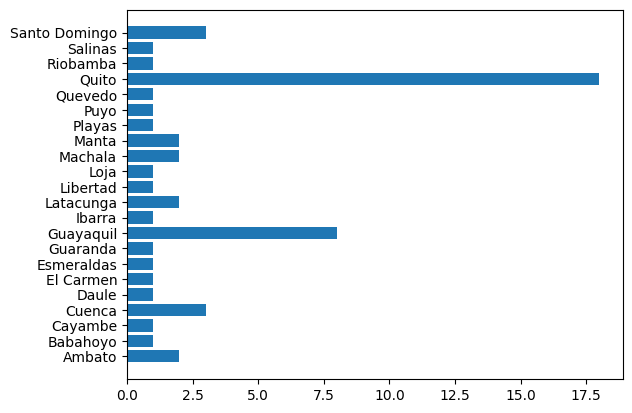

In [ ]:
group = df_stores.groupby('city')['store_nbr'].count().reset_index()
plt.barh(group['city'],group['store_nbr'])

In [ ]:
group.sort_values(by='store_nbr', ascending= False)

,city,store_nbr
18,Quito,18
8,Guayaquil,8
21,Santo Domingo,3
3,Cuenca,3
14,Manta,2
13,Machala,2
10,Latacunga,2
0,Ambato,2
7,Guaranda,1
9,Ibarra,1


### Transacciones por fecha

In [ ]:
# Esto lo puse arriba donde se hizo con los demas

# df_transactions['date'] = pd.to_datetime(df_transactions['date'])
# print(df_transactions.info())
# print(df_transactions.isna().sum())


plt.plot(df_transactions['date'], df_transactions['transactions'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB
None
date            0
store_nbr       0
transactions    0
dtype: int64


### Tiendas con mas transacciones

In [ ]:
group = df_transactions.groupby('store_nbr')['transactions'].sum().reset_index()
plt.bar(group['store_nbr'],group['transactions'])
plt.xlabel('Store Number')
plt.ylabel('Sum of transactions')
print(group.sort_values(by='transactions', ascending= False))

In [ ]:
result = df_transactions.merge(df_stores, how='left')
result = result.groupby('store_nbr')['transactions'].sum().reset_index()
result = result.sort_values(by='transactions', ascending= False)
result = result.merge(df_stores, how='left')
result
# group = result.groupby('city')['transactions'].sum().reset_index()
# plt.barh(result['city'],result['transactions'])

### Valor del Oil por fecha

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None
date           0
dcoilwtico    43
dtype: int64


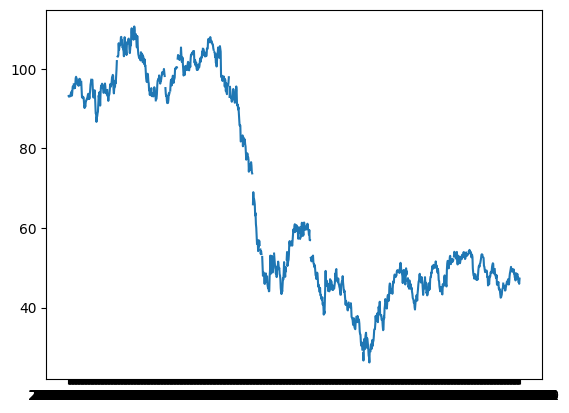

In [ ]:
# Esto lo puse arriba junto a los demas

# print(df_oil.info())
# print(df_oil.isna().sum())

# Hay que ponerle titulo a la grafica y asi
plt.plot(df_oil['date'],df_oil['dcoilwtico'])

### Quitar los NaNs de Oil

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 1 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1175 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.5 KB
None
date          0
dcoilwtico    0
dtype: int64


<ipython-input-23-113e8a5d49ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil['date'] = pd.to_datetime(df_oil['date'])


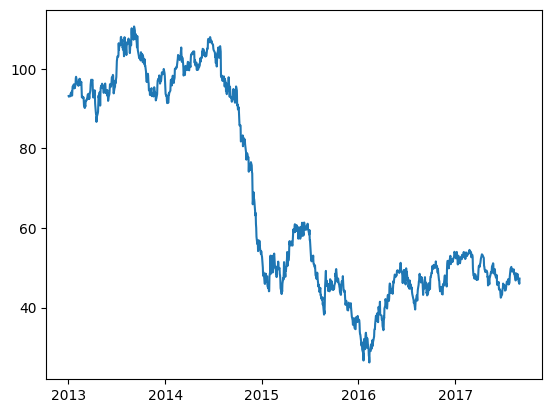

In [ ]:
df_oil = df_oil.dropna()
# plt.plot(df_oil['dcoilwtico'])
plt.plot(df_oil['date'], df_oil['dcoilwtico'])

### Crear una matriz de gráficos de dispersión para el df_train

array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='store_nbr', ylabel='id'>,
        <Axes: xlabel='sales', ylabel='id'>,
        <Axes: xlabel='onpromotion', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='store_nbr'>,
        <Axes: xlabel='store_nbr', ylabel='store_nbr'>,
        <Axes: xlabel='sales', ylabel='store_nbr'>,
        <Axes: xlabel='onpromotion', ylabel='store_nbr'>],
       [<Axes: xlabel='id', ylabel='sales'>,
        <Axes: xlabel='store_nbr', ylabel='sales'>,
        <Axes: xlabel='sales', ylabel='sales'>,
        <Axes: xlabel='onpromotion', ylabel='sales'>],
       [<Axes: xlabel='id', ylabel='onpromotion'>,
        <Axes: xlabel='store_nbr', ylabel='onpromotion'>,
        <Axes: xlabel='sales', ylabel='onpromotion'>,
        <Axes: xlabel='onpromotion', ylabel='onpromotion'>]], dtype=object)

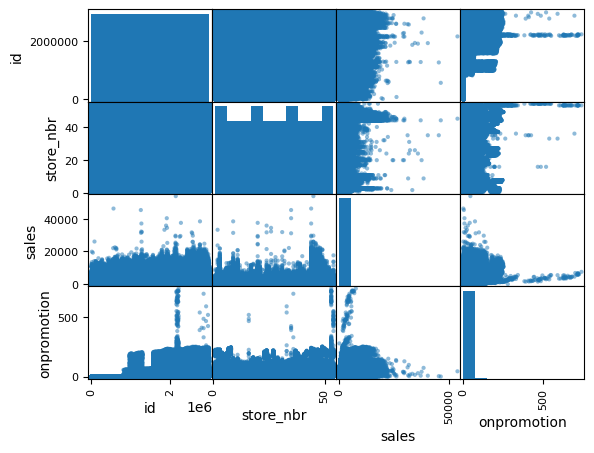

In [ ]:
pd.plotting.scatter_matrix(df_train)